In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
rabbit = cv2.imread('img_0.jpg')
rabbit.shape

(183, 275, 3)

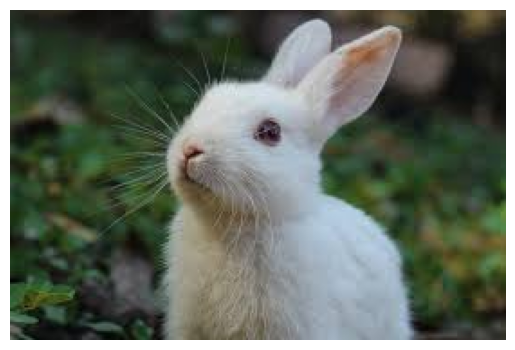

In [3]:
image_rgb = cv2.cvtColor(rabbit, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [4]:
image_hsv = cv2.cvtColor(rabbit, cv2.COLOR_BGR2HSV)

plt.imshow(image_hsv)
plt.axis('off')
plt.show()

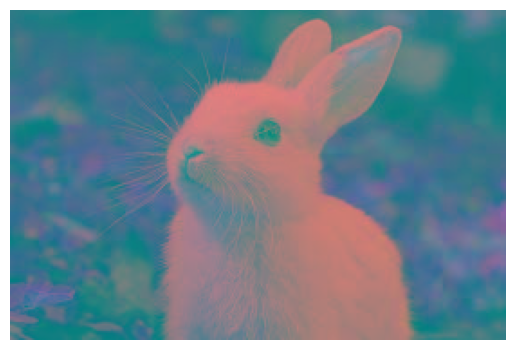

In [5]:
image_lab = cv2.cvtColor(rabbit, cv2.COLOR_BGR2Lab)

plt.imshow(image_lab)
plt.axis('off')
plt.show()

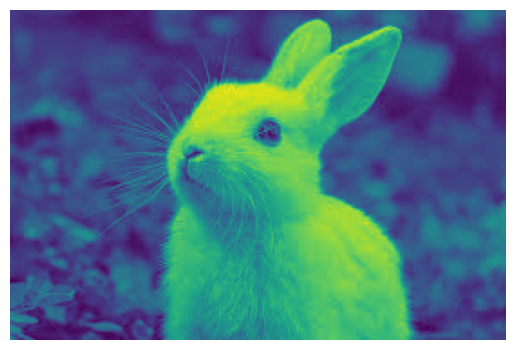

In [6]:
image_gray = cv2.cvtColor(rabbit, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray)
plt.axis('off')
plt.show()

### возможные преобразования:
1. cv2.COLOR_BGR2GRAY: Преобразование изображения из цветового пространства BGR в оттенки серого.
2. cv2.COLOR_BGR2RGB: Преобразование изображения из цветового пространства BGR в RGB.
3. cv2.COLOR_BGR2Lab: Преобразование изображения из цветового пространства BGR в цветовое пространство CIELAB.
4. cv2.COLOR_BGR2YUV: Преобразование изображения из цветового пространства BGR в цветовое пространство YUV.
5. cv2.COLOR_BGR2HLS: Преобразование изображения из цветового пространства BGR в цветовое пространство HLS.

In [7]:
resized_image = cv2.resize(image_rgb, (200, 200))

plt.imshow(resized_image)
plt.axis('off')
plt.show()

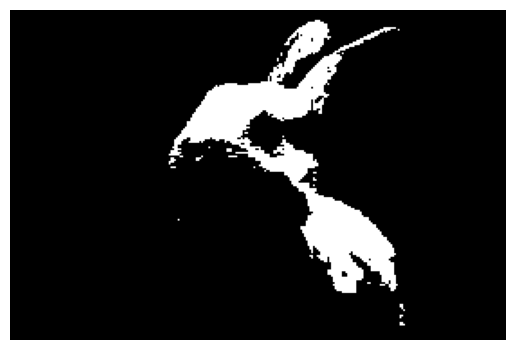

In [8]:
_, thresholded = cv2.threshold(image_gray,180, 255, cv2.THRESH_BINARY)

plt.imshow(thresholded, cmap='gray')
plt.axis('off')
plt.show()

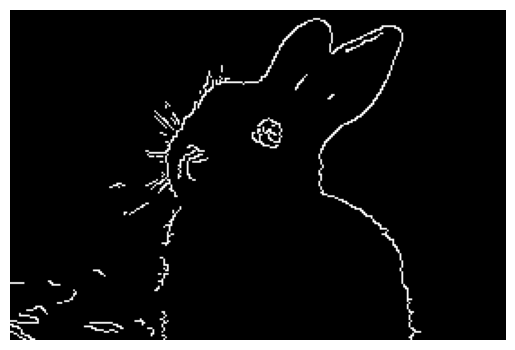

In [9]:
edges = cv2.Canny(image_gray, 180, 250)

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

In [10]:
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

mask = cv2.inRange(image_hsv, lower_green, upper_green)

res_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
plt.imshow(res_image)
plt.axis('off')
plt.show()

In [11]:
k = 15   # число кластеров (можно изменить по желанию)

pixel_values = np.float32(image_rgb.reshape((-1, 3)))

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2) # Критерии завершения (тип, макс. число итераций, требуемая точность)

_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_rgb.shape)

In [12]:
segmented_image.max(), segmented_image.min(), image_rgb.max(), image_rgb.min()

(215, 16, 238, 0)

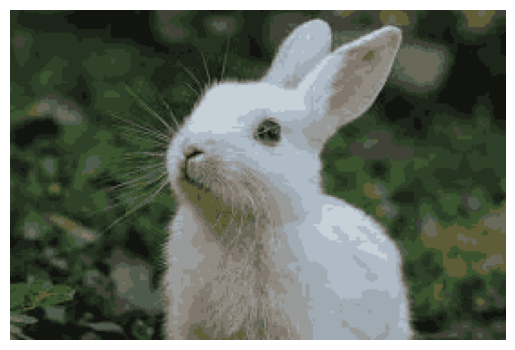

In [13]:
plt.imshow(segmented_image)
plt.axis('off')
plt.show()

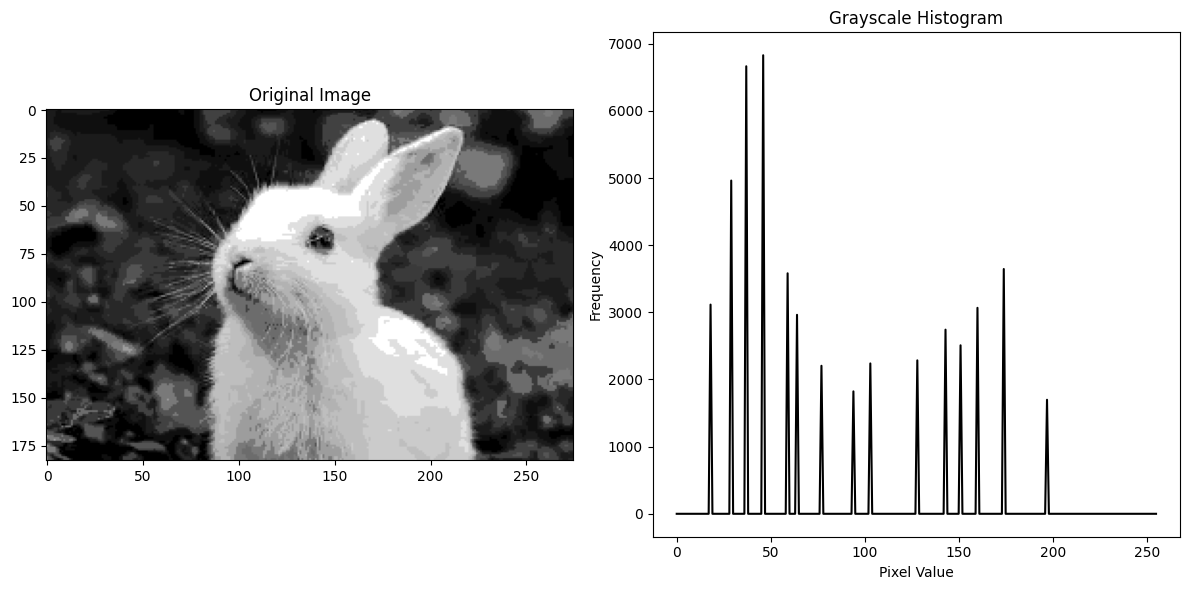

In [14]:
image = cv2.imread('img_0.jpg', cv2.IMREAD_GRAYSCALE)

# Вычисление гистограммы
hist = cv2.calcHist([segmented_image[:,:,0]], [0], None, [256], [0,256])

# Отображение изображения и его гистограммы
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(segmented_image[:,:,0], cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.plot(hist, color='black')
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Camera

In [23]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Ошибка: не удалось открыть камеру.")
else:
    while True:
        # Чтение кадра
        ret, frame = cap.read()

        flipped = cv2.flip(frame, flipCode = 1) #mirroring the video

        if not ret:
            print("Ошибка при чтении видео")
            break

        cv2.imshow('Mirrored Video Stream HW32', flipped)

        if cv2.waitKey(1) & 0xFF==ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

<img src='download.png' style="width:500px;height:400px"/>

In [22]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Ошибка: не удалось открыть камеру.")
else:
    while True:
        ret, frame = cap.read()

        if not ret:
            print("Ошибка при чтении видео.")
            break

        # Уменьшаем изображение в 2 раза
        flipped = cv2.flip(frame, flipCode = 1)
        frame = cv2.resize(flipped, (int(flipped.shape[1]/2), int(flipped.shape[0]/2)))

        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_yellow = np.array([20, 100, 100])
        upper_yellow = np.array([30, 255, 255]) 
        mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
        color_filtered = cv2.bitwise_and(frame, frame, mask=mask)

        # Фильтр границ (используем Canny детектор границ)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150)
        edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)  # делаем изображение трехканальным для объединения

        # Объединение изображений
        output = np.hstack((color_filtered, edges_colored, frame))

        cv2.imshow('Mirrored original, border detected and yellow highlighting HW32', output)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

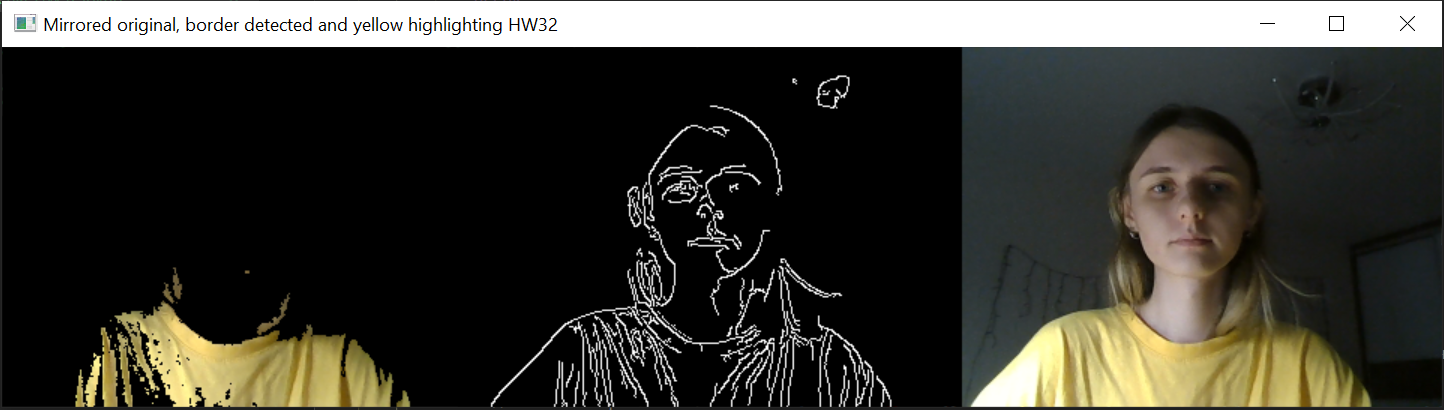

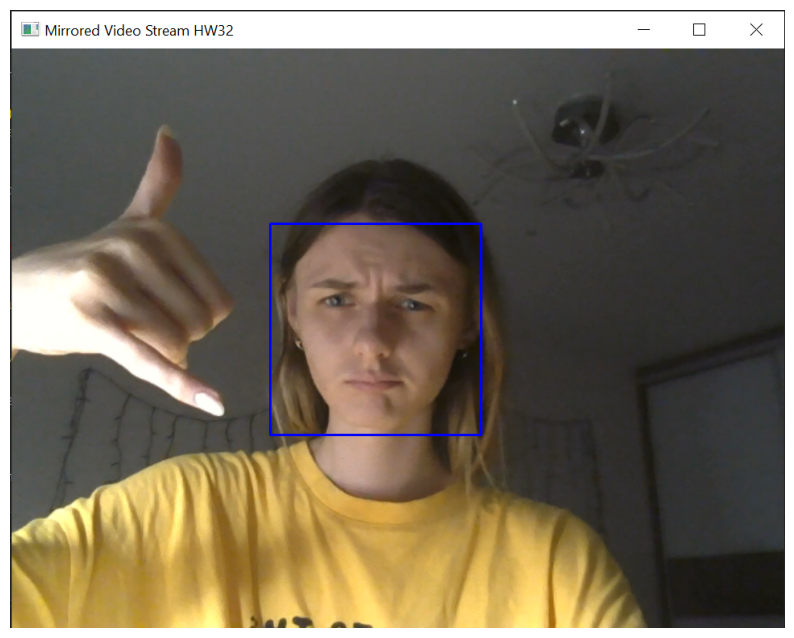

In [24]:
image = cv2.imread('download.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Применение размытия
# image = cv2.GaussianBlur(image, (151, 151), 150)

# Загрузка предварительно обученного каскада Хаара для детектирования лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

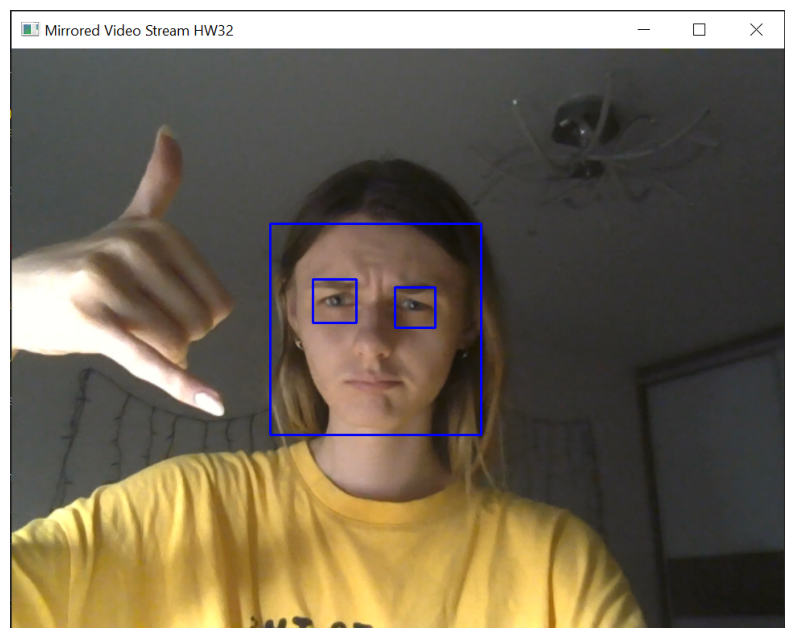

In [26]:
image = cv2.imread('download.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Применение размытия
# image = cv2.GaussianBlur(image, (151, 151), 150)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Обнаружение глаз
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
for (x, y, w, h) in eyes:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)


plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<li>haarcascade_frontalface_default.xml: Для обнаружения лиц, направленных прямо на камеру.
<li>haarcascade_frontalface_alt.xml: Альтернативный каскад для обнаружения лиц.
<li>haarcascade_frontalface_alt2.xml: Еще один альтернативный каскад для обнаружения лиц.
<li>haarcascade_frontalface_alt_tree.xml: И еще один.
<li>haarcascade_profileface.xml: Для обнаружения профилей лиц.
<li>haarcascade_eye.xml: Для обнаружения глаз.
<li>haarcascade_eye_tree_eyeglasses.xml: Для обнаружения глаз с очками.
<li>haarcascade_lefteye_2splits.xml: Для обнаружения левого глаза.
<li>haarcascade_righteye_2splits.xml: Для обнаружения правого глаза.
<li>haarcascade_smile.xml: Для обнаружения улыбок.
<li>haarcascade_upperbody.xml: Для обнаружения верхней части тела.
<li>haarcascade_lowerbody.xml: Для обнаружения нижней части тела.
<li>haarcascade_fullbody.xml: Для обнаружения полного тела.

In [32]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Ошибка: не удалось открыть камеру!")
    exit()

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    flipped = cv2.flip(frame, flipCode = 1)
    gray = cv2.cvtColor(flipped, cv2.COLOR_BGR2GRAY)
   
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(flipped, (x, y), (x+w, y+h), (255, 0, 0), 2)

    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in eyes:
        cv2.rectangle(flipped, (x, y), (x+w, y+h), (255, 255, 0), 2)

    cv2.imshow('Face Detection', flipped)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

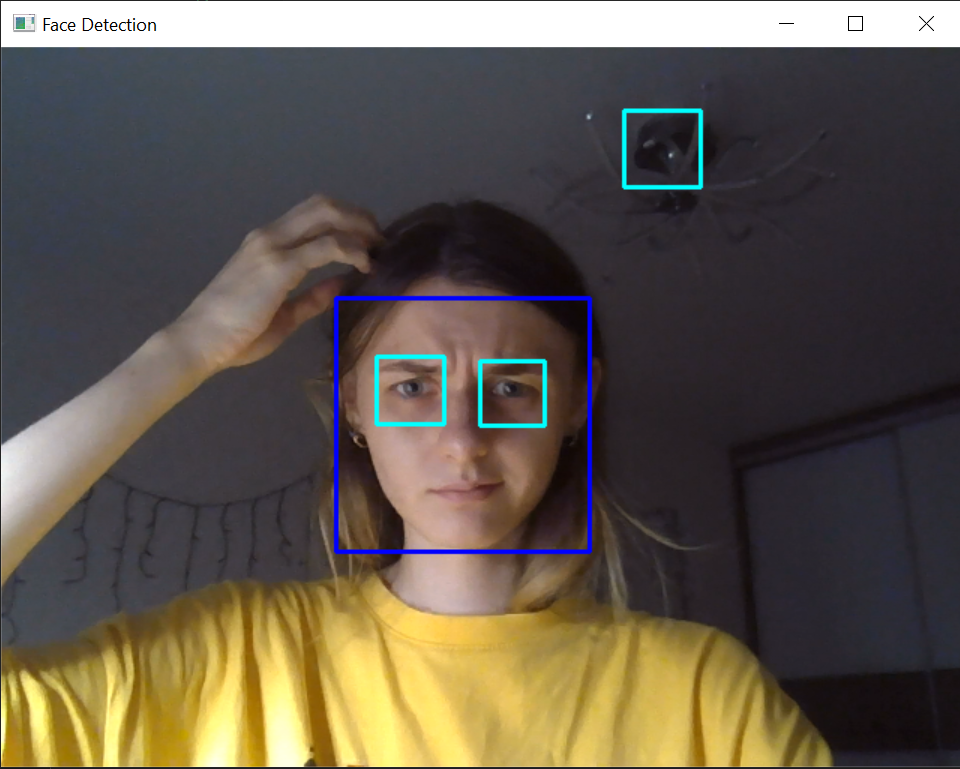

In [10]:
import mediapipe as mp

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()
cap = cv2.VideoCapture(0) 

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    flipped = cv2.flip(frame, flipCode = 1)
    results = face_mesh.process(flipped)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            for landmark in face_landmarks.landmark:
                x = int(landmark.x * flipped.shape[1])
                y = int(landmark.y * flipped.shape[0])
                cv2.circle(flipped, (x, y), 1, (0, 255, 0), -1)

    cv2.imshow('Face Mesh', flipped)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

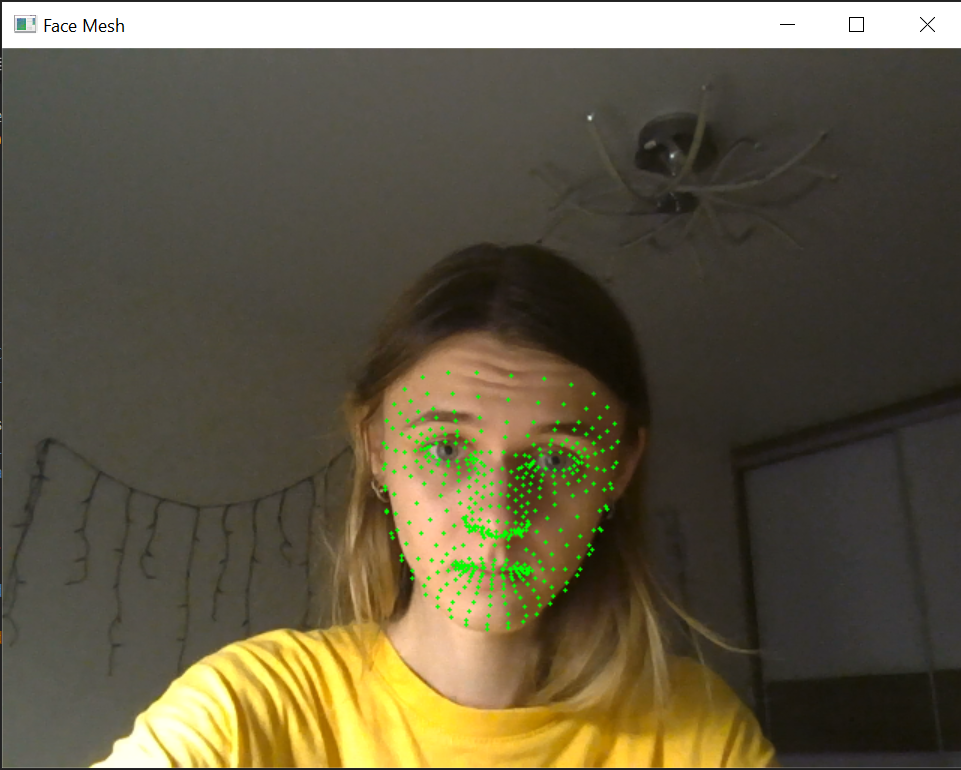

## Предсказание пола людей

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras_vggface.vggface import VGGFace

In [2]:
vggface = VGGFace(model='resnet50')

In [3]:
vggface.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                  

1/1 [==============================] - 2s 2s/step


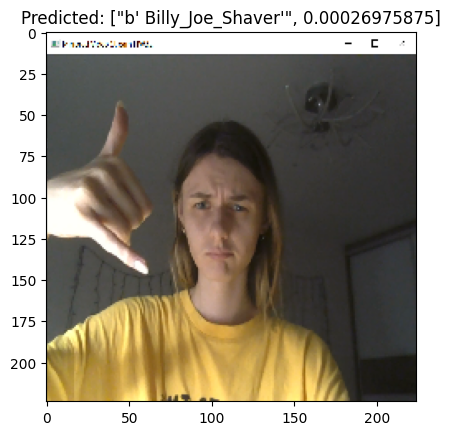

In [4]:
from keras_vggface import utils
from tensorflow.keras.preprocessing import image

img = image.load_img("download.png", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=2)

preds = vggface.predict(x) 
plt.title(f"Predicted: {utils.decode_predictions(preds)[0][0]}")
plt.imshow(img)

In [5]:
from pathlib import Path

data_folder = Path("UTKFace/")
filenames = list(map(lambda x: x.name, data_folder.glob('*.jpg')))
print(len(filenames))
print(filenames[:3])

23708
['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg']


### имя файла содержит возраст, индекс пола и расы, перечисленные через нижнее подчеркивание

In [6]:
np.random.seed(10)
np.random.shuffle(filenames)
gender_mapping = {0: 'Male', 1: 'Female'}
race_mapping = dict(list(enumerate(('White', 'Black', 'Asian', 'Indian', 'Others'))))
age_labels, gender_labels, race_labels, correct_filenames = [], [], [], []

for filename in filenames:
    if len(filename.split('_')) != 4:
        print(f"Bad filename {filename}")
        continue

    age, gender, race, _ = filename.split('_')
    correct_filenames.append(filename)
    age_labels.append(age)
    gender_labels.append(gender)
    race_labels.append(race)

age_labels = np.array(age_labels, dtype=np.float32)
max_age = age_labels.max()
data = {"img_name": correct_filenames,
        "age": age_labels / max_age, # нормализация возраста от 0 до 1
        "race": race_labels,
        "gender": gender_labels}
df = pd.DataFrame(data)
df.head()

Bad filename 61_1_20170109150557335.jpg.chip.jpg
Bad filename 61_1_20170109142408075.jpg.chip.jpg
Bad filename 39_1_20170116174525125.jpg.chip.jpg


img_name       age race gender
0  23_1_2_20170116172910708.jpg.chip.jpg  0.198276    2      1
1  28_0_1_20170113150719161.jpg.chip.jpg  0.241379    1      0
2  26_1_0_20170116234741431.jpg.chip.jpg  0.224138    0      1
3  37_0_3_20170119202516470.jpg.chip.jpg  0.318966    3      0
4  60_0_0_20170109013457906.jpg.chip.jpg  0.517241    0      0

In [7]:
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print(f"Размер тренировочной выборки: {len(df_train)}")
print(f"Размер тестовой выборки: {len(df_test)}")

Размер тренировочной выборки: 18964
Размер тестовой выборки: 4741


In [8]:
def decode_labels(race_id, gender_id, age):
    return race_mapping[int(race_id)], gender_mapping[int(gender_id)], int(age*max_age)

def show_face(image, race_id, gender_id, age):
    plt.imshow(image)
    race, gender, age = decode_labels(race_id, gender_id, age)
    plt.title(f"Gender: {gender}, Race: {race}, Age: {age}")

In [9]:
row = df_train.iloc[np.random.randint(len(df_train))]
img = plt.imread(str(data_folder/row["img_name"]))
show_face(img, row["race"], row["gender"], row["age"])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_vggface.utils import preprocess_input

def preprocess_input_facenet(image_):
    preprocessed = preprocess_input(image_, version=2)
    return preprocessed

image_gen = ImageDataGenerator(preprocessing_function=preprocess_input_facenet)

In [11]:
BATCH_SIZE = 128
IMAGE_SIZE = 224

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_facenet, horizontal_flip=True)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_facenet)

train_df = df_train.copy()
train_df['gender'] = train_df['gender'].astype(str) 
val_df = df_test.copy()
val_df['gender'] = val_df['gender'].astype(str) 

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=str(data_folder),
    x_col="img_name",
    y_col="gender",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True 
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=str(data_folder),
    x_col="img_name",
    y_col="gender",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False 
)

Found 18964 validated image filenames belonging to 2 classes.
Found 4741 validated image filenames belonging to 2 classes.


In [12]:
sample_images, sample_labels = next(val_generator)

plt.imshow(sample_images[100])
print(gender_mapping[int(sample_labels[100])])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Male


In [16]:
VGGFACE2_MEAN = [91.4953, 103.8827, 131.0912]

def deprocess_image(vggface_image):
    image = np.copy(vggface_image)
    
    # Добавляем средние значения RGB
    image[..., 0] += VGGFACE2_MEAN[0]
    image[..., 1] += VGGFACE2_MEAN[1]
    image[..., 2] += VGGFACE2_MEAN[2]
    
    # Обрезаем значения к диапазону [0, 255]
    image = np.clip(image, 0, 255).astype(np.uint8)
    
    return image


sample_images, sample_labels = next(val_generator)
plt.imshow(deprocess_image(sample_images[5]))
print(gender_mapping[int(sample_labels[5])])

Male


In [17]:
base_model = tf.keras.Model([vggface.input], vggface.get_layer("flatten").output) # убираем последний слой модели
base_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                             

In [18]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model

for layer in base_model.layers:
    layer.trainable = False
    
x = base_model.output
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
EPOCHS = 5

history = model.fit(train_generator, steps_per_epoch=train_generator.samples // BATCH_SIZE, validation_data=val_generator,
                    validation_steps=val_generator.samples // BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
148/148 [==============================] - 1661s 11s/step - loss: 0.3308 - accuracy: 0.8833 - val_loss: 0.1730 - val_accuracy: 0.9400
Epoch 2/5
148/148 [==============================] - 1951s 13s/step - loss: 0.1944 - accuracy: 0.9241 - val_loss: 0.1678 - val_accuracy: 0.9402
Epoch 3/5
148/148 [==============================] - 1904s 13s/step - loss: 0.1757 - accuracy: 0.9320 - val_loss: 0.1556 - val_accuracy: 0.9445
Epoch 4/5
148/148 [==============================] - 1873s 13s/step - loss: 0.1615 - accuracy: 0.9363 - val_loss: 0.1502 - val_accuracy: 0.9447
Epoch 5/5
148/148 [==============================] - 1842s 12s/step - loss: 0.1477 - accuracy: 0.9396 - val_loss: 0.1441 - val_accuracy: 0.9449


In [24]:
loss, acc = model.evaluate(val_generator)
print(f"Accuracy:{acc}")

38/38 [==============================] - 535s 14s/step - loss: 0.1441 - accuracy: 0.9449
Accuracy:0.9449483156204224


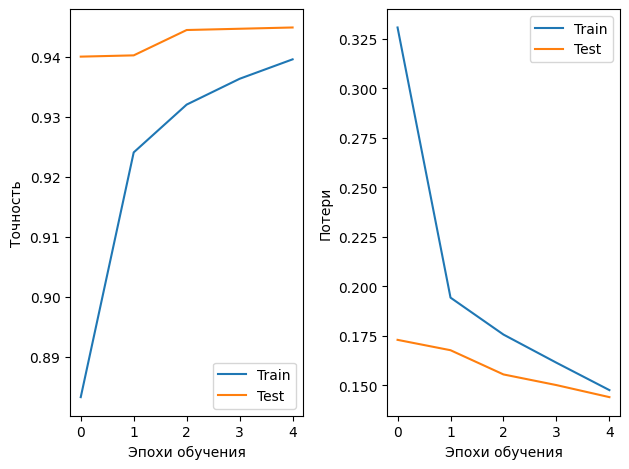

In [31]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Точность на тренировочном сете')
plt.plot(history.history['val_accuracy'], label = 'Точность на тестовом сете')
plt.xlabel('Эпохи обучения')
plt.ylabel('Точность')
plt.legend(["Train", "Test"], loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Потери на тренировочном сете')
plt.plot(history.history['val_loss'], label = 'Потери на тестовом сете')
plt.xlabel('Эпохи обучения')
plt.ylabel('Потери')
plt.legend(["Train", "Test"], loc="upper right")

plt.tight_layout()
plt.show()

In [21]:
def show_faces(images, real_race=None, real_gender=None, real_age=None,
               predicted_race=None, predicted_gender=None, predicted_age=None):
    plt.figure(figsize=(10,10))
    labels = {"Gender": [predicted_gender, real_gender],
                  "Race": [predicted_race, real_race],
                  "Age": [predicted_age, real_age]}
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(deprocess_image(images[i]))
        real_str = "Real:"
        pred_str = "Pred:"
        correct = True
        for name, (predicted, real) in labels.items():
            if predicted is None:
                continue
            if name == "Age":
                real_age = int(real[i]*int(max_age))
                predicted_age = int(predicted[i]*max_age)
                real_str += f"{real_age}"
                pred_str += f"{predicted_age}"
                if np.abs(predicted_age - real_age) > 6:
                    correct = False
            elif name == "Gender":
                real_gender = int(real[i])
                predicted_gender = int(predicted[i] > 0.5)
                real_str += f"{gender_mapping[real_gender]}, "
                pred_str += f"{gender_mapping[predicted_gender]}, "
                if real_gender != predicted_gender:
                    correct = False
            elif name == "Race":
                real_race = int(real[i])
                predicted_race = np.argmax(predicted[i])
                real_str += f"{race_mapping[real_race]}, "
                pred_str += f"{race_mapping[predicted_race]}, "
                if real_race != predicted_race:
                    correct = False

        title_obj = plt.title(f"{real_str}\n{pred_str}")

        plt.subplots_adjust(wspace=0.4)
        if not correct:
            plt.setp(title_obj, color='r')

4/4 [==============================] - 12s 3s/step


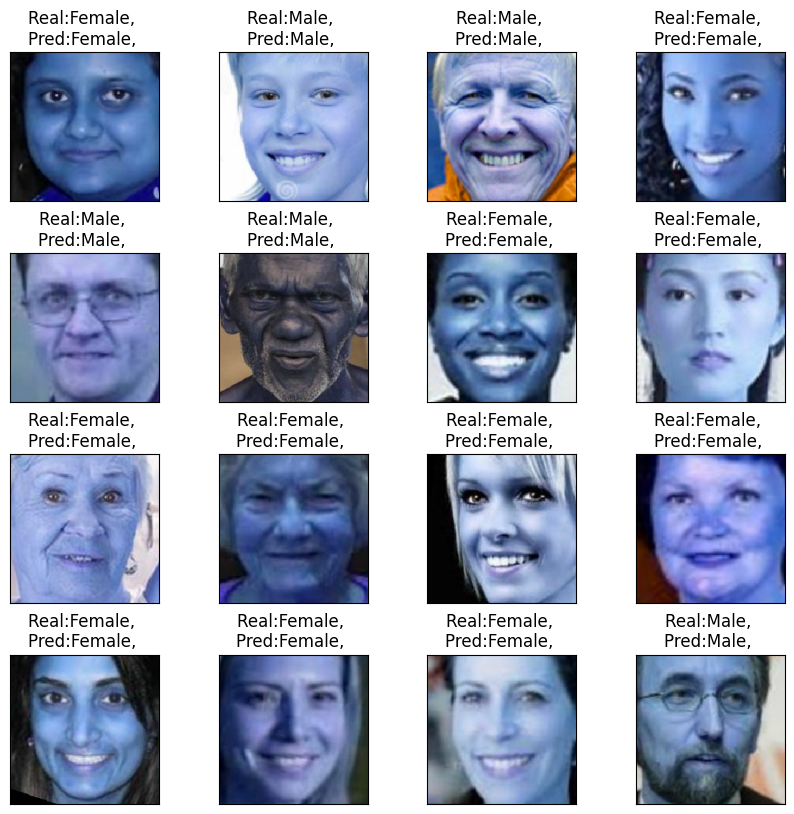

In [22]:
sample_validation_images, sample_validation_labels = next(val_generator)
predicted = model.predict(sample_validation_images)
show_faces(sample_validation_images, real_gender=sample_validation_labels, predicted_gender=predicted)